# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

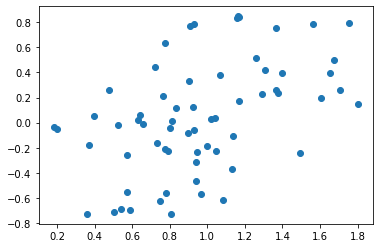

In [81]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1
plt.scatter(x.T[0], y)

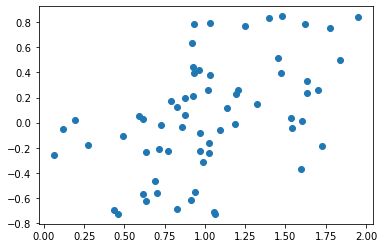

In [82]:
plt.scatter(x.T[1], y)

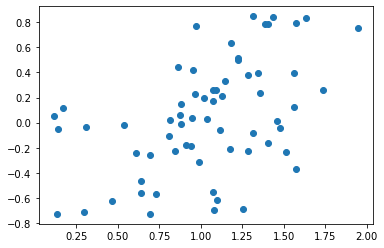

In [83]:
plt.scatter(x.T[2], y)

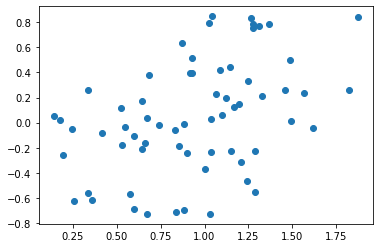

In [84]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [85]:
beta = np.dot(np.linalg.inv(np.dot(x.T, x)),np.dot(y.T, x))
beta

array([ 0.2592804 ,  0.22098194,  0.21751186,  0.08929873, -0.74070191])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

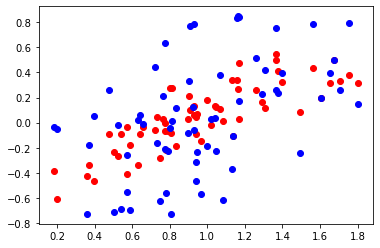

In [86]:
pred = np.dot(x, beta)
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

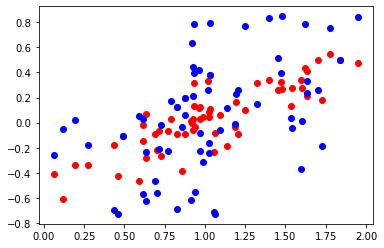

In [88]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

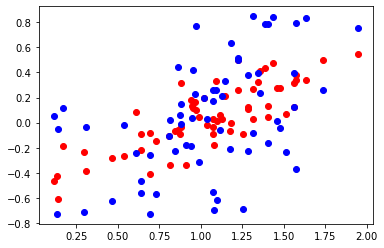

In [89]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

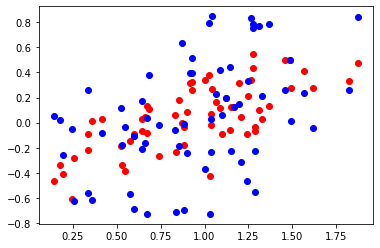

In [90]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [91]:
import pandas as pd
import numpy as np

credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [92]:
columns = ['Income', 'Limit', 'Age', 'Balance']
x = credit[columns].values

x = np.vstack([x.T, np.ones(len(x))]).T
x

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 9.66000e+02, 1.00000e+00]])

In [93]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [107]:
beta = np.linalg.lstsq(x, y)[0]
pred = np.dot(x, beta)
beta

<ipython-input-107-ca6108295cc8>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x, y)[0]


array([1.31880513e-01, 6.26253800e-02, 3.19381468e-02, 1.50244935e-02,
       4.28168820e+01])

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

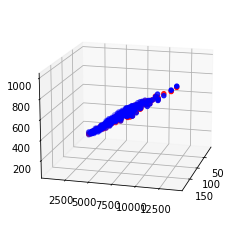

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')

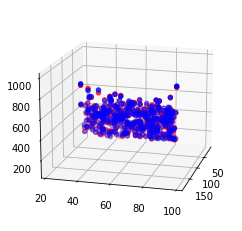

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[0], x.T[2], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[2], y, zdir='z', c='b')

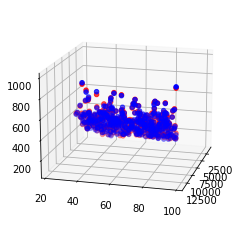

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[1], x.T[2], pred, zdir='z', c='r')
ax.scatter(x.T[1], x.T[2], y, zdir='z', c='b')

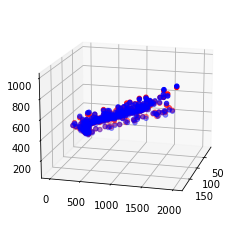

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[0], x.T[3], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[3], y, zdir='z', c='b')

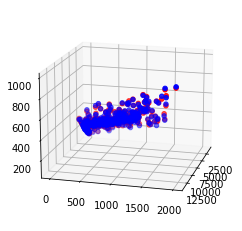

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[1], x.T[3], pred, zdir='z', c='r')
ax.scatter(x.T[1], x.T[3], y, zdir='z', c='b')

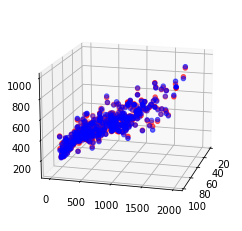

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[2], x.T[3], pred, zdir='z', c='r')
ax.scatter(x.T[2], x.T[3], y, zdir='z', c='b')

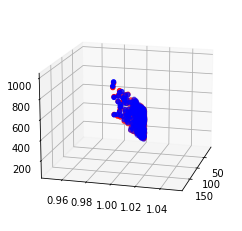

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[0], x.T[4], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[4], y, zdir='z', c='b')

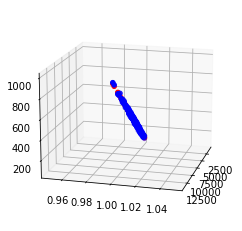

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[1], x.T[4], pred, zdir='z', c='r')
ax.scatter(x.T[1], x.T[4], y, zdir='z', c='b')

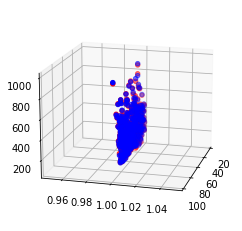

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[2], x.T[4], pred, zdir='z', c='r')
ax.scatter(x.T[2], x.T[4], y, zdir='z', c='b')

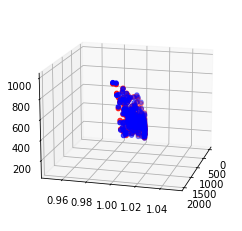

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16, 15)
ax.scatter(x.T[3], x.T[4], pred, zdir='z', c='r')
ax.scatter(x.T[3], x.T[4], y, zdir='z', c='b')